<a href="https://colab.research.google.com/github/katamveera/TRINIT-CodingBots-ML/blob/main/Sexual_Harassment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install shap

Import necessary libraries

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import shap

Load dataset

In [5]:
dataset = pd.read_csv('/content/test.csv (1).zip')

Data Preprocessing
Tokenization, stop-word removal, vectorization

In [6]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(dataset['Description'])
y = dataset['Commenting']

Split data into training and testing sets

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Training
Support Vector Machine (SVM) classifier

In [8]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

Create the Kernel SHAP Explainer

In [9]:
X_train += 0
background_summary = shap.kmeans(X_train,1)
explainer = shap.KernelExplainer(svm_classifier.predict, background_summary)

Compute SHAP Values

  0%|          | 0/341 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2307: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2307: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_

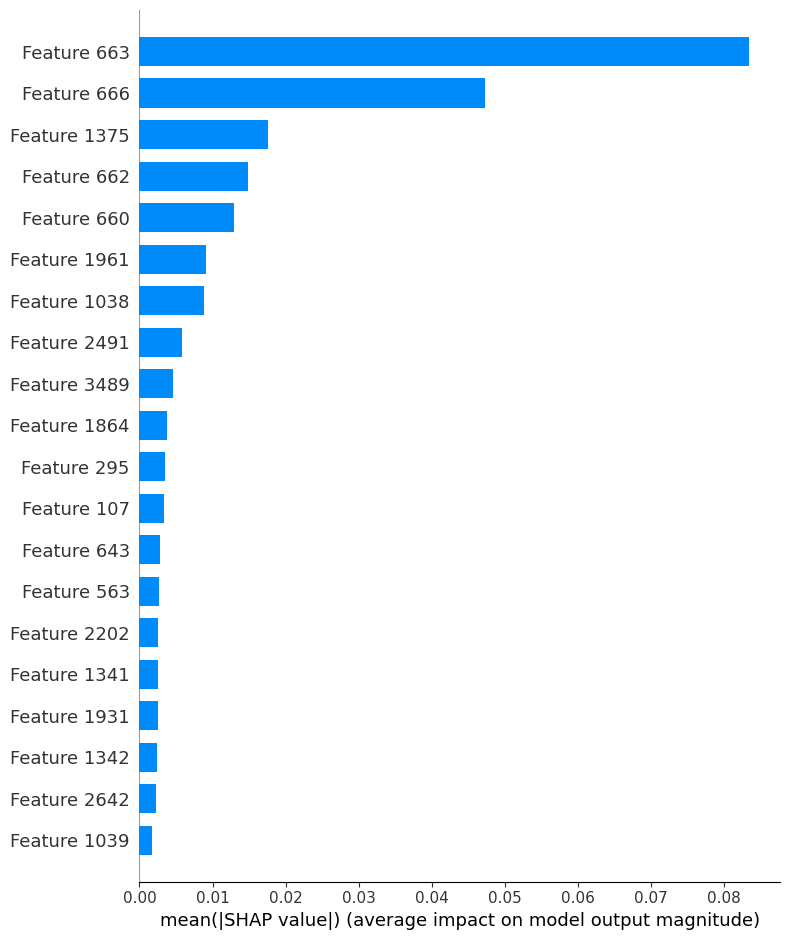

In [10]:
shap_values = explainer(X_test)
# Visualization Module
shap.summary_plot(shap_values, X_test, plot_type="bar")

Evaluation Metric: Hamming Score for multi-classification model

In [11]:
hamming_score = svm_classifier.score(X_test, y_test)
print("Hamming Score:", hamming_score)

Hamming Score: 0.7800586510263929


Identity: Compare explanations with actual model behavior

In [12]:
def compute_identity_accuracy(explanations, model_predictions):
    # Compute accuracy by comparing explanations with model predictions
    correct = 0
    total = len(model_predictions)
    for i in range(total):
        if np.array_equal(explanations[i], model_predictions[i]):
            correct += 1

Separability: Assess distinctiveness of explanations for different classes

In [13]:
def compute_separability(explanations, model_predictions):
    # Compute separability by comparing explanations for different classes
    unique_explanations = set()
    for i in range(len(model_predictions)):
        unique_explanations.add((model_predictions[i], explanations[i]))
    return len(unique_explanations) / len(model_predictions)

Similarity: Measure consistency of explanations for similar instances

In [14]:
def compute_similarity(explanations, similar_instances):
    # Compute similarity between explanations for similar instances
    similarity_scores = []
    for instance in similar_instances:
        similarity_score = cosine_similarity(explanations[instance], explanations[instance+1])
        similarity_scores.append(similarity_score)
    return np.mean(similarity_scores)

Stability: Evaluate robustness of explanations to perturbations

In [15]:
def compute_stability(explanations, perturbed_explanations):
    # Compute stability by comparing explanations with perturbed explanations
    stability_scores = []
    for i in range(len(explanations)):
        stability_score = np.linalg.norm(explanations[i] - perturbed_explanations[i])
        stability_scores.append(stability_score)
    return np.mean(stability_scores)

Perturb data function for stability evaluation

In [16]:
def perturb_data(data, epsilon):
    # Add noise to the data to create perturbed instances
    perturbed_data = data + epsilon * np.random.randn(*data.shape)
    return perturbed_data


Now, compute the metrics
Compute SHAP Values

In [17]:
shap_values = explainer.shap_values(X_test)

  0%|          | 0/341 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2307: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2307: RuntimeWarning: invalid value encountered in divide
  + residuals_sum_squares / self.noise_variance_
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_angle.py:2306: RuntimeWarning: divide by zero encountered in log
  n_samples * np.log(2 * np.pi * self.noise_variance_)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_least_

Identity,Separability,Similarity,Stability

In [38]:
# Identity
import numpy as np
# Identity: Compare explanations with actual model behavior (e.g., model predictions)
def compute_identity_accuracy(explanations, model_predictions):
    # Compute accuracy by comparing explanations with model predictions
    correct = 0
    total = len(model_predictions)
    for i in range(total):
        if np.array_equal(np.argmax(explanations[i]), np.argmax(model_predictions[i])):
            correct += 1
    return correct / total

# Compute identity accuracy
identity_accuracy = compute_identity_accuracy(shap_values, svm_classifier.predict(X_test))
print("Identity Accuracy:", identity_accuracy)


Identity Accuracy: 0.6774193548387096


In [27]:
def compute_separability(explanations, model_predictions):
    # Compute separability by comparing explanations for different classes
    unique_explanations = set()
    for i in range(len(model_predictions)):
        unique_explanations.add((model_predictions[i], tuple(explanations[i])))
    return len(unique_explanations) / len(model_predictions)
# Separability
separability_score = compute_separability(shap_values, svm_classifier.predict(X_test))
print("Separability Score:", separability_score)

Separability Score: 0.26392961876832843


In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# Similarity: Measure consistency of explanations for similar instances
def compute_similarity(explanations, similar_instances):
    # Compute similarity between explanations for similar instances
    similarity_scores = []
    for instance in similar_instances:
        # Ensure explanations is a 2D array
        if len(explanations.shape) == 1:
            explanations = explanations.reshape(1, -1)  # Reshape to 2D array
        # Compute cosine similarity between explanations
        similarity_score = cosine_similarity(explanations[instance].reshape(1, -1), explanations[instance+1].reshape(1, -1))
        similarity_scores.append(similarity_score)
    return np.mean(similarity_scores)

# Define similar_instances (assuming it is defined)
similar_instances = [12, 1]

# Call compute_similarity function
similarity_score = compute_similarity(shap_values, similar_instances)

# Print the result
print("Similarity Score:", similarity_score)


Similarity Score: 0.0
